<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week8_hoangmanhthang/Model/RNN/KDH_RNN_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [218]:
# 2. Read file csv
df = pd.read_csv('KDH-Historical-Data.csv')
df.head()

,Date,Price
0,2017-01-03,9198.4
1,2017-01-04,9198.4
2,2017-01-05,8944.8
3,2017-01-06,9083.2
4,2017-01-07,9106.2


In [219]:
# 3. Select 'Price' column and reset index
df = df.reset_index()['Price']
df

0        9198.4
1        9198.4
2        8944.8
3        9083.2
4        9106.2
         ...   
2702    36250.0
2703    35700.0
2704    36050.0
2705    36200.0
2706    36000.0
Name: Price, Length: 2707, dtype: float64

In [220]:
# 4. Scale "Price" column between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [221]:
# 5. Split train:test ratio
# 8:2
train_size_8_2 = int(0.7 * len(df))
test_size_8_2 = int(0.3 * len(df))
train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]


In [222]:
# 6. Create sequences of past values (based on time_step)
# and assign the next value in the series as the target for each sequence
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [223]:
# 7. Create training and testing data
time_step = 100

x, y = create_dataset(df, time_step)

# 8:2 ratio
x_train_8_2 = x[:train_size_8_2-100]
x_test_8_2 = x[train_size_8_2-100:]
y_train_8_2 = y[:train_size_8_2-100]
y_test_8_2 = y[train_size_8_2-100:]


In [224]:
# 9. Reshape training and testing data - ratio 8:2
x_train_8_2 = x_train_8_2.reshape(x_train_8_2.shape[0],x_train_8_2.shape[1] , 1)
x_test_8_2 = x_test_8_2.reshape(x_test_8_2.shape[0],x_test_8_2.shape[1] , 1)

In [225]:
from numpy import array

In [226]:
def forecast_future_days(model, test_data, pred_days):
    # Đảm bảo dữ liệu test_data có ít nhất 20 phần tử
    if len(test_data) < 20:
        raise ValueError("Test data must contain at least 20 elements.")

    # Lấy 20 phần tử cuối cùng của dữ liệu kiểm tra và định hình lại cho phù hợp với mô hình
    x_input = test_data[-20:].reshape(1, -1)
    temp_input = list(x_input[0])

    lst_output = []
    n_steps = x_input.shape[1]  # 20 bước
    i = 0

    # Vòng lặp dự đoán
    while i < pred_days:
        if len(temp_input) > n_steps:
            # Nếu số phần tử trong temp_input lớn hơn số bước (n_steps), cắt bỏ phần tử đầu tiên
            x_input = np.array(temp_input[1:]).reshape(1, -1)
            x_input = x_input.reshape((1, n_steps, 1))

            # Dự đoán với mô hình
            yhat = model.predict(x_input, verbose=0)

            # Cập nhật danh sách đầu vào và lưu trữ dự đoán
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            # Dự đoán với mô hình nếu số phần tử trong temp_input không lớn hơn số bước
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)

            # Cập nhật danh sách đầu vào và lưu trữ dự đoán
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1

    return lst_output


## 8:2

In [227]:
# 19. Build model
model_8_2 =Sequential()
model_8_2.add(SimpleRNN(50, input_shape=(time_step, 1)))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

In [228]:
# 20. Fit model
model_8_2.fit(x_train_8_2, y_train_8_2, validation_data=(x_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
29/29 [==============================] - 3s 67ms/step - loss: 0.0084 - val_loss: 0.0031
Epoch 2/100
29/29 [==============================] - 2s 62ms/step - loss: 4.5281e-04 - val_loss: 6.9733e-04
Epoch 3/100
29/29 [==============================] - 3s 106ms/step - loss: 3.6250e-04 - val_loss: 6.2300e-04
Epoch 4/100
29/29 [==============================] - 2s 67ms/step - loss: 2.8662e-04 - val_loss: 6.8993e-04
Epoch 5/100
29/29 [==============================] - 2s 63ms/step - loss: 2.7428e-04 - val_loss: 5.5911e-04
Epoch 6/100
29/29 [==============================] - 2s 62ms/step - loss: 2.7028e-04 - val_loss: 0.0011
Epoch 7/100
29/29 [==============================] - 2s 60ms/step - loss: 3.4212e-04 - val_loss: 0.0015
Epoch 8/100
29/29 [==============================] - 2s 61ms/step - loss: 4.0636e-04 - val_loss: 6.0012e-04
Epoch 9/100
29/29 [==============================] - 2s 75ms/step - loss: 2.7750e-04 - val_loss: 7.3689e-04
Epoch 10/100
29/29 [=======================

In [229]:
# 21. Predict
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

26/26 [==============================] - 0s 10ms/step


array([[0.871276  ],
       [0.87978774],
       [0.8784382 ],
       [0.8581137 ],
       [0.862543  ],
       [0.8625472 ],
       [0.86646855],
       [0.86654407],
       [0.8638139 ],
       [0.86289376],
       [0.894971  ],
       [0.897564  ],
       [0.9054088 ],
       [0.91696393],
       [0.85839444],
       [0.89309496],
       [0.88200533],
       [0.82901883],
       [0.8369814 ],
       [0.80977935],
       [0.80431503],
       [0.8134952 ],
       [0.80598754],
       [0.81057626],
       [0.815605  ],
       [0.8004138 ],
       [0.77809036],
       [0.7833868 ],
       [0.7700877 ],
       [0.7791173 ],
       [0.77783746],
       [0.75820464],
       [0.7619916 ],
       [0.7691539 ],
       [0.7629897 ],
       [0.7455472 ],
       [0.7523906 ],
       [0.75408703],
       [0.7443313 ],
       [0.75717825],
       [0.74799824],
       [0.7336791 ],
       [0.7406276 ],
       [0.73635215],
       [0.73793733],
       [0.7026546 ],
       [0.705435  ],
       [0.696

In [230]:
# 22. Apply inverse scaling to the original data scale
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[46140.62 ],
       [46503.992],
       [46446.38 ],
       [45578.703],
       [45767.797],
       [45767.977],
       [45935.383],
       [45938.605],
       [45822.055],
       [45782.77 ],
       [47152.188],
       [47262.883],
       [47597.79 ],
       [48091.094],
       [45590.688],
       [47072.094],
       [46598.668],
       [44336.61 ],
       [44676.543],
       [43515.25 ],
       [43281.973],
       [43673.887],
       [43353.375],
       [43549.273],
       [43763.953],
       [43115.426],
       [42162.41 ],
       [42388.523],
       [41820.77 ],
       [42206.25 ],
       [42151.613],
       [41313.465],
       [41475.137],
       [41780.902],
       [41517.746],
       [40773.1  ],
       [41065.258],
       [41137.68 ],
       [40721.195],
       [41269.65 ],
       [40877.742],
       [40266.44 ],
       [40563.08 ],
       [40380.555],
       [40448.23 ],
       [38941.97 ],
       [39060.664],
       [38675.062],
       [38331.332],
       [39010.688],


In [231]:
# 23. Forecast 90 days, including 30 days and 60 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 90)

In [232]:
forecast_30days_8_2 = forecast_90days_8_2[:30]
forecast_60days_8_2 = forecast_90days_8_2[30:60]
forecast_90days_8_2 = forecast_90days_8_2[60:]

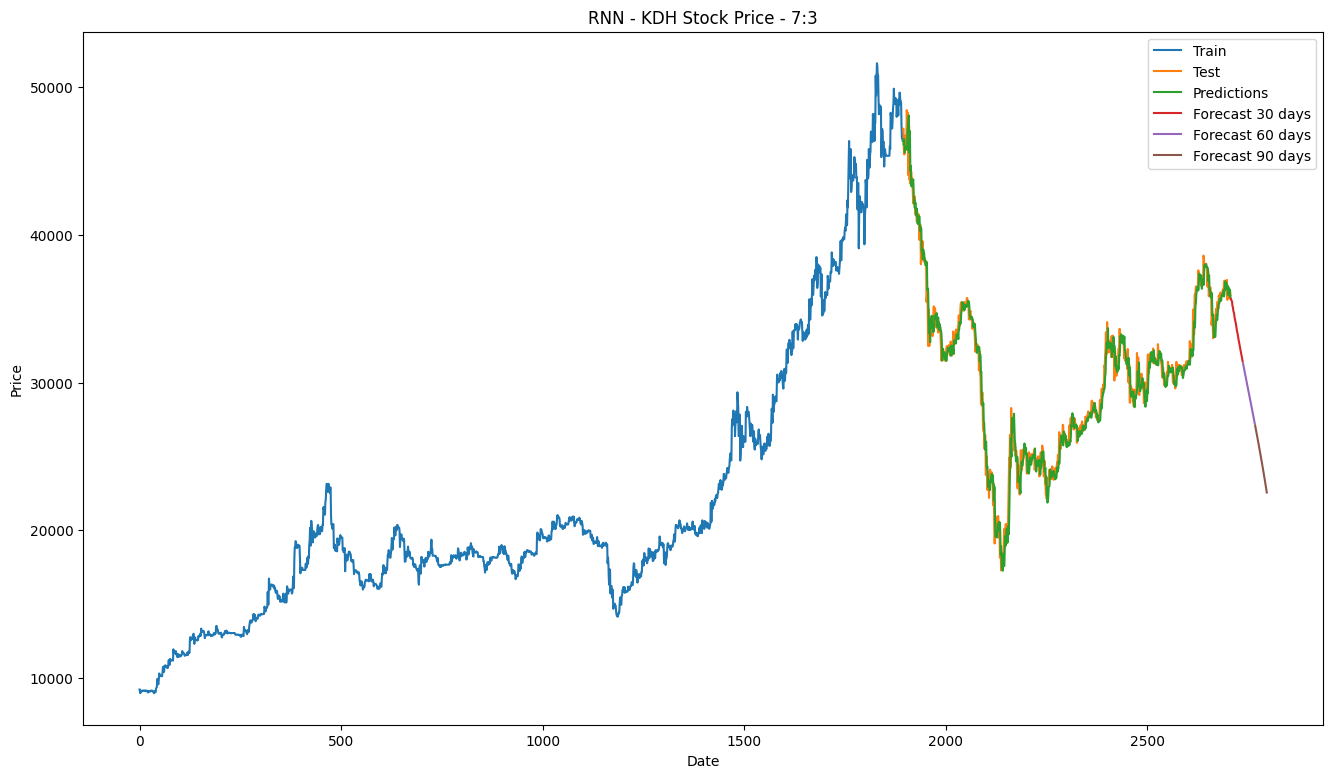

In [233]:
# 24. Plot the results
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2) + len(forecast_60days_8_2), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2) + len(forecast_60days_8_2) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('RNN - KDH Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [234]:
# 25. Evaluate the model
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2) * 100
print("MAPE:", mape)

RMSE: 717.1707493358974
MAE: 504.53290277991596
MAPE: 1.7326953702524652
